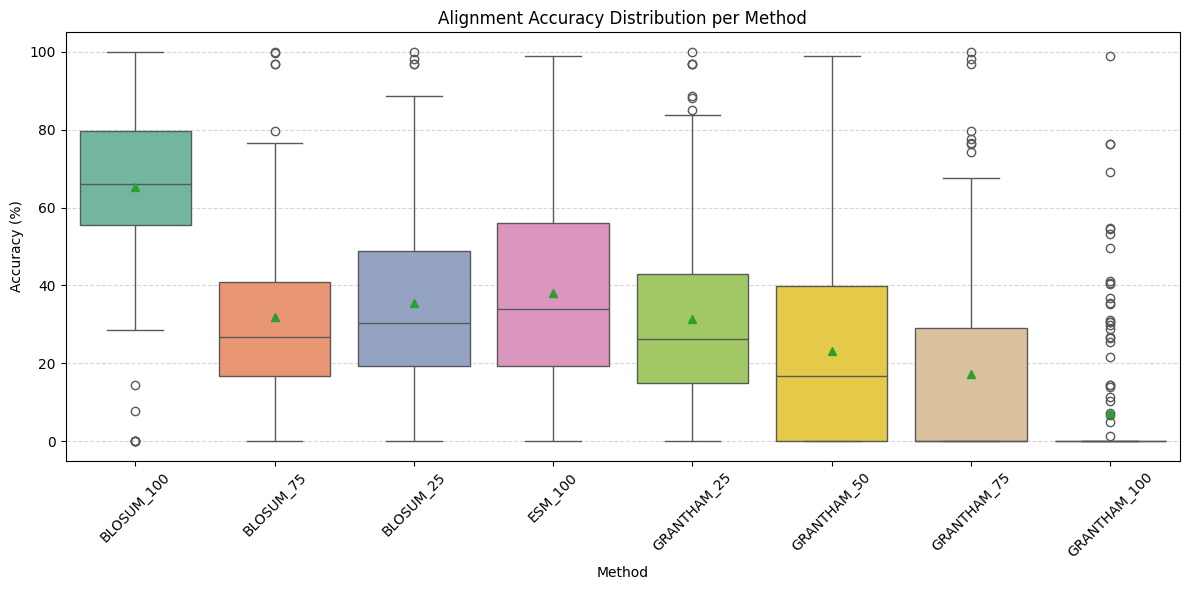


Best method overall: BLOSUM_100 (mean accuracy = 65.21%)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

files = {
    "BLOSUM_100": "blosum_AGC_AKT1_eval_results_100static.csv",
    "BLOSUM_75": "blosum_AGC_AKT1_eval_results_75static.csv",
    "BLOSUM_25": "blosum_AGC_AKT1_eval_results_25static.csv",
    "ESM_100": "esm_AGC_AKT1_eval_results.csv",
    "GRANTHAM_25": "grantham_AGC_AKT1_eval_results_25static.csv",
    "GRANTHAM_50": "grantham_AGC_AKT1_eval_results_50static.csv",
    "GRANTHAM_75": "grantham_AGC_AKT1_eval_results_75static.csv",
    "GRANTHAM_100": "grantham_AGC_AKT1_eval_results_100static.csv"
}

frames = []
for label, path in files.items():
    df = pd.read_csv(path)
    df["Method"] = label
    frames.append(df)

combined_df = pd.concat(frames, ignore_index=True)
combined_df["Accuracy"] = pd.to_numeric(combined_df["Accuracy"], errors="coerce").fillna(0)

summary_stats = combined_df.groupby("Method")["Accuracy"].describe()

summary_stats.to_csv("alignment_method_summary_stats.csv")

plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x="Method", y="Accuracy", hue="Method", dodge=False,
            palette="Set2", showmeans=True, legend=False)
plt.title("Alignment Accuracy Distribution per Method")
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

best_method = summary_stats["mean"].idxmax()
best_score = summary_stats["mean"].max()

print(f"\nBest method overall: {best_method} (mean accuracy = {best_score:.2f}%)")


In [ ]:
import pandas as pd
combined_df["Accuracy"] = pd.to_numeric(combined_df["Accuracy"], errors="coerce")

summary = combined_df.groupby("Method")["Accuracy"].agg(
    Mean="mean",
    StdDev="std",
    Median="median",
    Min="min",
    Max="max",
    Count="count"
).round(2)

summary = summary.sort_values("Mean", ascending=False)
print(summary)


               Mean  StdDev  Median  Min     Max  Count
Method                                                 
BLOSUM_100    65.21   20.70   65.96  0.0  100.00    160
ESM_100       38.15   24.96   33.93  0.0   98.84    153
BLOSUM_25     35.51   23.44   30.34  0.0  100.00    153
BLOSUM_75     31.85   21.64   26.86  0.0  100.00    153
GRANTHAM_25   31.45   25.19   26.23  0.0  100.00    153
GRANTHAM_50   23.16   25.06   16.81  0.0   98.84    153
GRANTHAM_75   17.29   24.05    0.00  0.0  100.00    153
GRANTHAM_100   7.17   17.47    0.00  0.0   98.84    153


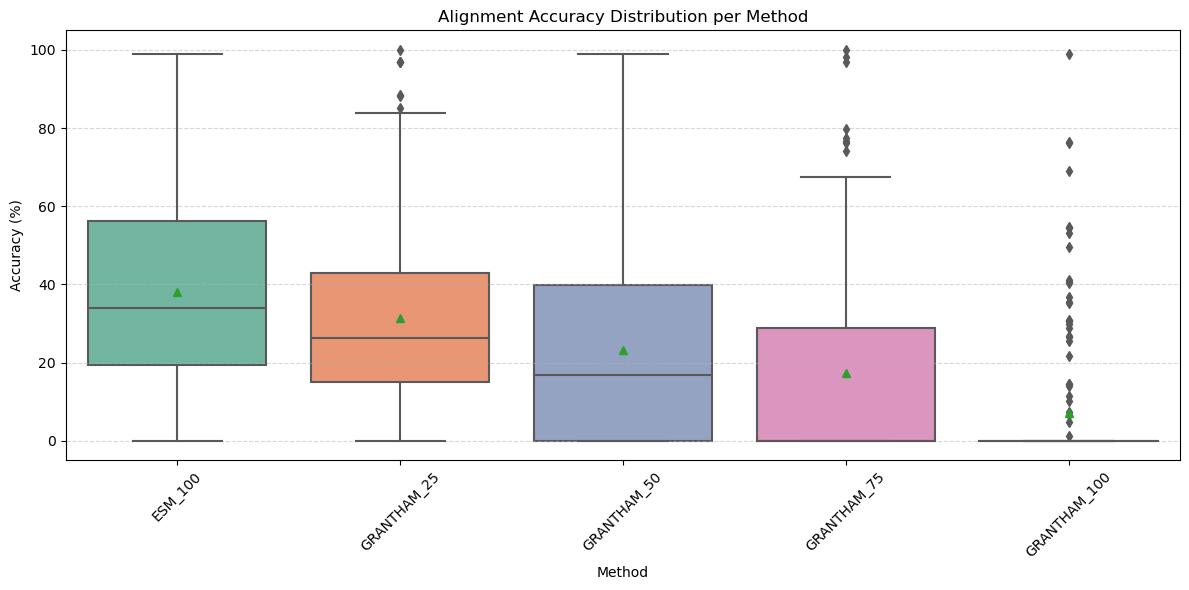


Best method overall: ESM_100 (mean accuracy = 38.15%)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

files = {
    "ESM_100": "../results/esm_AGC_AKT1_eval_results_0static.csv",
    "GRANTHAM_25": "../results/grantham + esm2/grantham_AGC_AKT1_eval_results_25static.csv",
    "GRANTHAM_50": "../results/grantham + esm2/grantham_AGC_AKT1_eval_results_50static.csv",
    "GRANTHAM_75": "../results/grantham + esm2/grantham_AGC_AKT1_eval_results_75static.csv",
    "GRANTHAM_100": "../results/grantham + esm2/grantham_AGC_AKT1_eval_results_100static.csv"
}


frames = []
for label, path in files.items():
    df = pd.read_csv(path)
    df["Method"] = label
    frames.append(df)

combined_df = pd.concat(frames, ignore_index=True)
combined_df["Accuracy"] = pd.to_numeric(combined_df["Accuracy"], errors="coerce").fillna(0)

summary_stats = combined_df.groupby("Method")["Accuracy"].describe()
summary_stats.to_csv("alignment_method_summary_stats.csv")

plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x="Method", y="Accuracy", hue="Method", dodge=False, palette="Set2", showmeans=True)
plt.title("Alignment Accuracy Distribution per Method")
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend().remove()
plt.show()

best_method = summary_stats["mean"].idxmax()
best_score = summary_stats["mean"].max()
print(f"\nBest method overall: {best_method} (mean accuracy = {best_score:.2f}%)")


/var/folders/_0/r_xcv_6n1mgbcdr1zsr6l7300000gn/T/ipykernel_42008/2739222361.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="Method", y="Accuracy", palette=palette, showmeans=True)


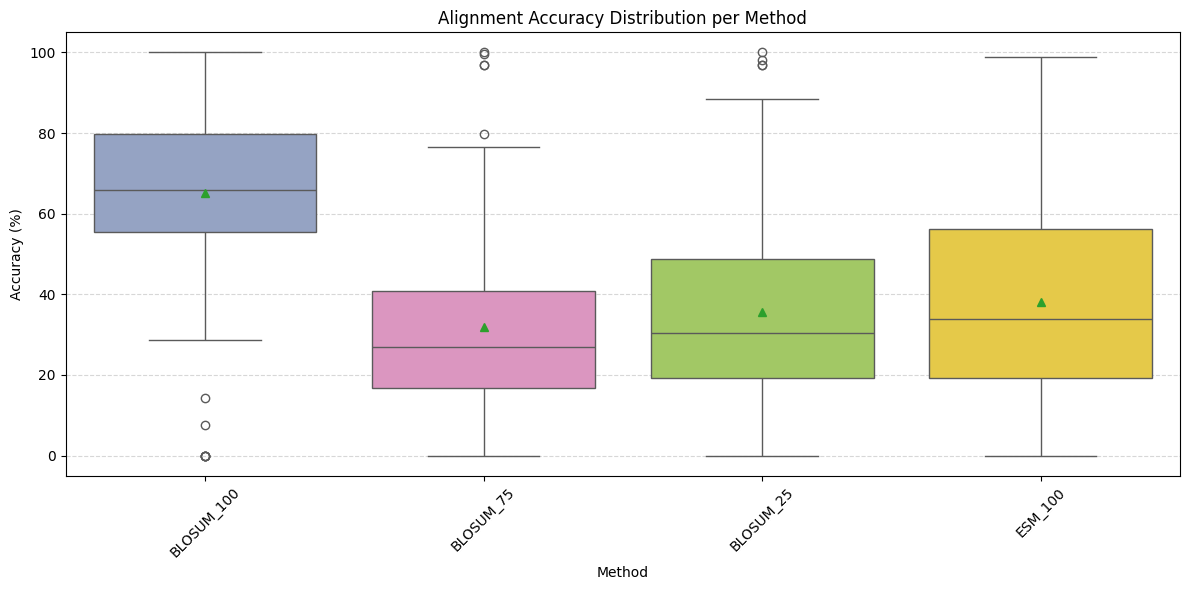

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

full_palette = sns.color_palette("Set2", n_colors=8)
later_colors = full_palette[2:6]  # skip first 2 colors
method_order = ["BLOSUM_100", "BLOSUM_75", "BLOSUM_25", "ESM_100"]
palette = dict(zip(method_order, later_colors))

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_df, x="Method", y="Accuracy", palette=palette, showmeans=True)
plt.title("Alignment Accuracy Distribution per Method")
plt.xticks(rotation=45)
plt.ylabel("Accuracy (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()